In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from AdversarialAttack import SAVE,LOAD
from IPython import display
%matplotlib inline

In [2]:
#Global configuration
attackMode = 'Detection' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 1000 #Query Budgets
NumberOfTest = 15 #Number of test images
random.seed(42) #Set random seeds

hourglass: 0.9856477
guillotine: 0.00010379316
china_cabinet: 0.0001016978
nipple: 7.471215e-05
cougar: 6.023419e-05
dugong: 5.404314e-05


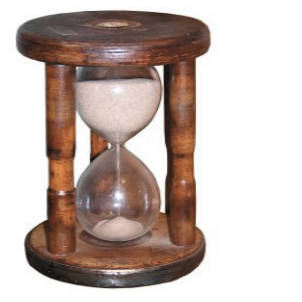

In [3]:
#Prepare test images
File,ImgPre = ResultSave('HSJA','./Result/InceptionD')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)

In [4]:
#Run the experiments
from HJSA import hsja
constraint = 'linf'#norm: l2; linf
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        timehistory,adversarial = hsja(image,constraint=constraint,max_query=queryBudgets)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)


round 0: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 2.7595E-01
iteration: 2, linf distance 5.1313E-02
iteration: 3, linf distance 6.5754E-02
iteration: 4, linf distance 5.2162E-02
iteration: 5, linf distance 3.3690E-02
Attack result: L2:14.677143478606963, Linf:0.033690422773361206
round 1: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 4.5008E-01
iteration: 2, linf distance 3.0390E-01
iteration: 3, linf distance 3.0445E-01
iteration: 4, linf distance 2.7676E-01
iteration: 5, linf distance 2.6906E-01
Attack result: L2:93.46099058933339, Linf:0.2690563499927521
round 2: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 4.3139E-01
iteration: 2, linf distance 4.9272E-01
iteration: 3, linf distance 5.1392E-01
iteration: 4, linf distance 4.7255E-01
iteration: 5, linf distance 5.3002E-01
Attack result: L2:122.94743750549266, Linf:0.4313884377479553
round 3: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 8.7641E-02
iteration: 2, linf distance 8.7641E-02
iteration: 3, linf distance 1.2928E-01
iteration: 4, linf distance 1.0795E-01
iteration: 5, linf distance 8.8785E-02
Attack result: L2:34.8331878512563, Linf:0.08764094114303589
round 4: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 4.1907E-01
iteration: 2, linf distance 5.3100E-01
iteration: 3, linf distance 5.2237E-01
iteration: 4, linf distance 6.1870E-01
iteration: 5, linf distance 4.3907E-01
Attack result: L2:152.04139159860048, Linf:0.4190673828125
round 5: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 2.3340E-01
iteration: 2, linf distance 3.8624E-01
iteration: 3, linf distance 2.2196E-01
iteration: 4, linf distance 2.2196E-01
iteration: 5, linf distance 2.6361E-01
Attack result: L2:89.98643919589105, Linf:0.22196149826049805
round 6: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 4.3702E-01
iteration: 2, linf distance 5.9867E-03
iteration: 3, linf distance 7.3647E-03
iteration: 4, linf distance 8.7361E-03
iteration: 5, linf distance 6.5300E-03
Attack result: L2:2.4820676482274133, Linf:0.005986690521240234
round 7: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 3.5208E-01
iteration: 2, linf distance 3.7226E-01
iteration: 3, linf distance 4.3508E-01
iteration: 4, linf distance 4.3026E-01
iteration: 5, linf distance 4.2610E-01
Attack result: L2:122.39307173637103, Linf:0.35208165645599365
round 8: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 1.7125E-01
iteration: 2, linf distance 2.1165E-01
iteration: 3, linf distance 2.1597E-01
iteration: 4, linf distance 2.8990E-01
iteration: 5, linf distance 2.5948E-01
Attack result: L2:64.46324512520405, Linf:0.17125070095062256
round 9: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 6.0776E-01
iteration: 2, linf distance 6.9382E-01
iteration: 3, linf distance 7.5034E-01
iteration: 4, linf distance 6.2362E-01
iteration: 5, linf distance 6.5273E-01
Attack result: L2:206.0607970926542, Linf:0.6077569425106049
round 10: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 1.2296E-03
iteration: 2, linf distance 1.9036E-03
iteration: 3, linf distance 2.1992E-03
iteration: 4, linf distance 2.6602E-03
iteration: 5, linf distance 2.7997E-03
Attack result: L2:0.6198164059678205, Linf:0.0012295842170715332
round 11: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 6.0018E-01
iteration: 2, linf distance 6.4608E-01
iteration: 3, linf distance 5.8079E-01
iteration: 4, linf distance 5.6729E-01
iteration: 5, linf distance 6.0880E-01
Attack result: L2:128.50047745113747, Linf:0.31523409485816956
round 12: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 1.6568E-01
iteration: 2, linf distance 2.4248E-01
iteration: 3, linf distance 2.6425E-01
iteration: 4, linf distance 2.4460E-01
iteration: 5, linf distance 2.6553E-01
Attack result: L2:71.15416803189937, Linf:0.16568297147750854
round 13: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 3.9033E-01
iteration: 2, linf distance 1.0677E-01
iteration: 3, linf distance 1.3820E-01
iteration: 4, linf distance 1.3700E-01
iteration: 5, linf distance 1.5538E-01
Attack result: L2:48.85089127702823, Linf:0.10676687955856323
round 14: 

  0%|          | 0/1000 [00:00<?, ?it/s]

iteration: 1, linf distance 6.3246E-01
iteration: 2, linf distance 6.8903E-01
iteration: 3, linf distance 7.3621E-01
iteration: 4, linf distance 6.8621E-01
iteration: 5, linf distance 7.6903E-01
Attack result: L2:209.36339300263916, Linf:0.6324645578861237


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/server2080ti/anaconda3/envs/Adv/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
(71, 2)
3
89.98643919589105
0.22196149826049805


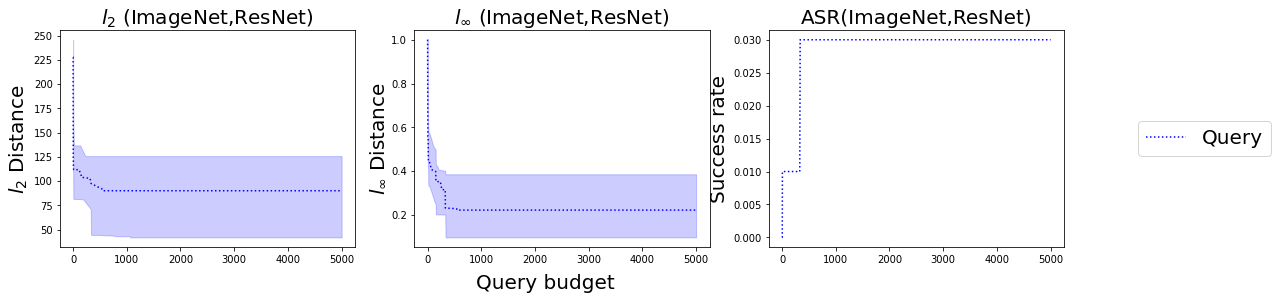

In [5]:
from Visualization import Result
Valid=100
fontsize=20
Range=5000
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))
#Ver3.Plot(0,Valid,1000,ax1)
vis.Plot(0,Valid,Range,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,Range,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,Range,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)